In [1]:
# Libraries
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

In [2]:
# Read in data
df = pd.read_csv('analytic_data2019.csv', low_memory=False)

In [3]:
df.head(10) # Has a lot of NaN and repeated values

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,Male population 18-44 raw value,Male population 45-64 raw value,Male population 65+ raw value,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value
0,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v013_rawvalue,v016_rawvalue,v017_rawvalue,v025_rawvalue,v026_rawvalue,v027_rawvalue,v031_rawvalue,v032_rawvalue,v035_rawvalue,v097_rawvalue
1,00,000,00000,US,United States,2019,NaN,6900.630354,3745538,908266078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01,000,01000,AL,Alabama,2019,NaN,9917.2328984,80440,13636816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01,001,01001,AL,Autauga County,2019,1,8824.0571232,815,156132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01,003,01003,AL,Baldwin County,2019,1,7224.6321603,2827,576496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01,005,01005,AL,Barbour County,2019,1,9586.165037,451,72222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,01,007,01007,AL,Bibb County,2019,1,11783.543675,445,63653,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,01,009,01009,AL,Blount County,2019,1,10908.101822,1050,161107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,01,011,01011,AL,Bullock County,2019,1,12066.910263,205,29266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,01,013,01013,AL,Butler County,2019,1,14018.606262,393,54804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head(-10) # Last several columns are looking pretty absent

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,Male population 18-44 raw value,Male population 45-64 raw value,Male population 65+ raw value,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value
0,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v013_rawvalue,v016_rawvalue,v017_rawvalue,v025_rawvalue,v026_rawvalue,v027_rawvalue,v031_rawvalue,v032_rawvalue,v035_rawvalue,v097_rawvalue
1,00,000,00000,US,United States,2019,NaN,6900.630354,3745538,908266078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01,000,01000,AL,Alabama,2019,NaN,9917.2328984,80440,13636816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01,001,01001,AL,Autauga County,2019,1,8824.0571232,815,156132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01,003,01003,AL,Baldwin County,2019,1,7224.6321603,2827,576496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01,005,01005,AL,Barbour County,2019,1,9586.165037,451,72222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,01,007,01007,AL,Bibb County,2019,1,11783.543675,445,63653,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,01,009,01009,AL,Blount County,2019,1,10908.101822,1050,161107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,01,011,01011,AL,Bullock County,2019,1,12066.910263,205,29266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,01,013,01013,AL,Butler County,2019,1,14018.606262,393,54804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
list(df.columns)

['State FIPS Code',
 'County FIPS Code',
 '5-digit FIPS Code',
 'State Abbreviation',
 'Name',
 'Release Year',
 'County Ranked (Yes=1/No=0)',
 'Premature death raw value',
 'Premature death numerator',
 'Premature death denominator',
 'Premature death CI low',
 'Premature death CI high',
 'Premature death (Black)',
 'Premature death (Hispanic)',
 'Premature death (White)',
 'Poor or fair health raw value',
 'Poor or fair health numerator',
 'Poor or fair health denominator',
 'Poor or fair health CI low',
 'Poor or fair health CI high',
 'Poor physical health days raw value',
 'Poor physical health days numerator',
 'Poor physical health days denominator',
 'Poor physical health days CI low',
 'Poor physical health days CI high',
 'Poor mental health days raw value',
 'Poor mental health days numerator',
 'Poor mental health days denominator',
 'Poor mental health days CI low',
 'Poor mental health days CI high',
 'Low birthweight raw value',
 'Low birthweight numerator',
 'Low birthw

In [6]:
# Getting rid of everything except for raw data columns or other things that seem important
headers_ = [x for x in df.columns if 'raw value' in x
           or 'FIPS' in x
           or 'State Abbreviation' in x
           or 'Name' in x
           or 'County Ranked' in x
           or 'Percentage of households' in x
           ]

df = df[headers_] 


In [7]:
df.info() # 114 features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Columns: 114 entries, State FIPS Code to Population growth raw value
dtypes: object(114)
memory usage: 2.8+ MB


In [8]:
list(df.columns)

['State FIPS Code',
 'County FIPS Code',
 '5-digit FIPS Code',
 'State Abbreviation',
 'Name',
 'County Ranked (Yes=1/No=0)',
 'Premature death raw value',
 'Poor or fair health raw value',
 'Poor physical health days raw value',
 'Poor mental health days raw value',
 'Low birthweight raw value',
 'Adult smoking raw value',
 'Adult obesity raw value',
 'Food environment index raw value',
 'Physical inactivity raw value',
 'Access to exercise opportunities raw value',
 'Excessive drinking raw value',
 'Alcohol-impaired driving deaths raw value',
 'Sexually transmitted infections raw value',
 'Teen births raw value',
 'Uninsured raw value',
 'Primary care physicians raw value',
 'Dentists raw value',
 'Mental health providers raw value',
 'Preventable hospital stays raw value',
 'Mammography screening raw value',
 'Flu vaccinations raw value',
 'High school graduation raw value',
 'Some college raw value',
 'Unemployment raw value',
 'Children in poverty raw value',
 'Income inequality r

In [9]:
report = pandas_profiling.ProfileReport(df)

/usr/local/lib/python3.7/site-packages/pandas_profiling/describe.py:404: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [10]:
report

Number of variables,114
Number of observations,3195
Total Missing (%),32.1%
Total size in memory,2.8 MiB
Average record size in memory,912.0 B
Numeric,0
Categorical,113
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [11]:
df.isna().sum()

State FIPS Code                         0
County FIPS Code                        0
5-digit FIPS Code                       0
State Abbreviation                      0
Name                                    0
                                     ... 
Female population 18-44 raw value    3121
Female population 45-64 raw value    3121
Female population 65+ raw value      3121
Total female population raw value    3121
Population growth raw value          3121
Length: 114, dtype: int64

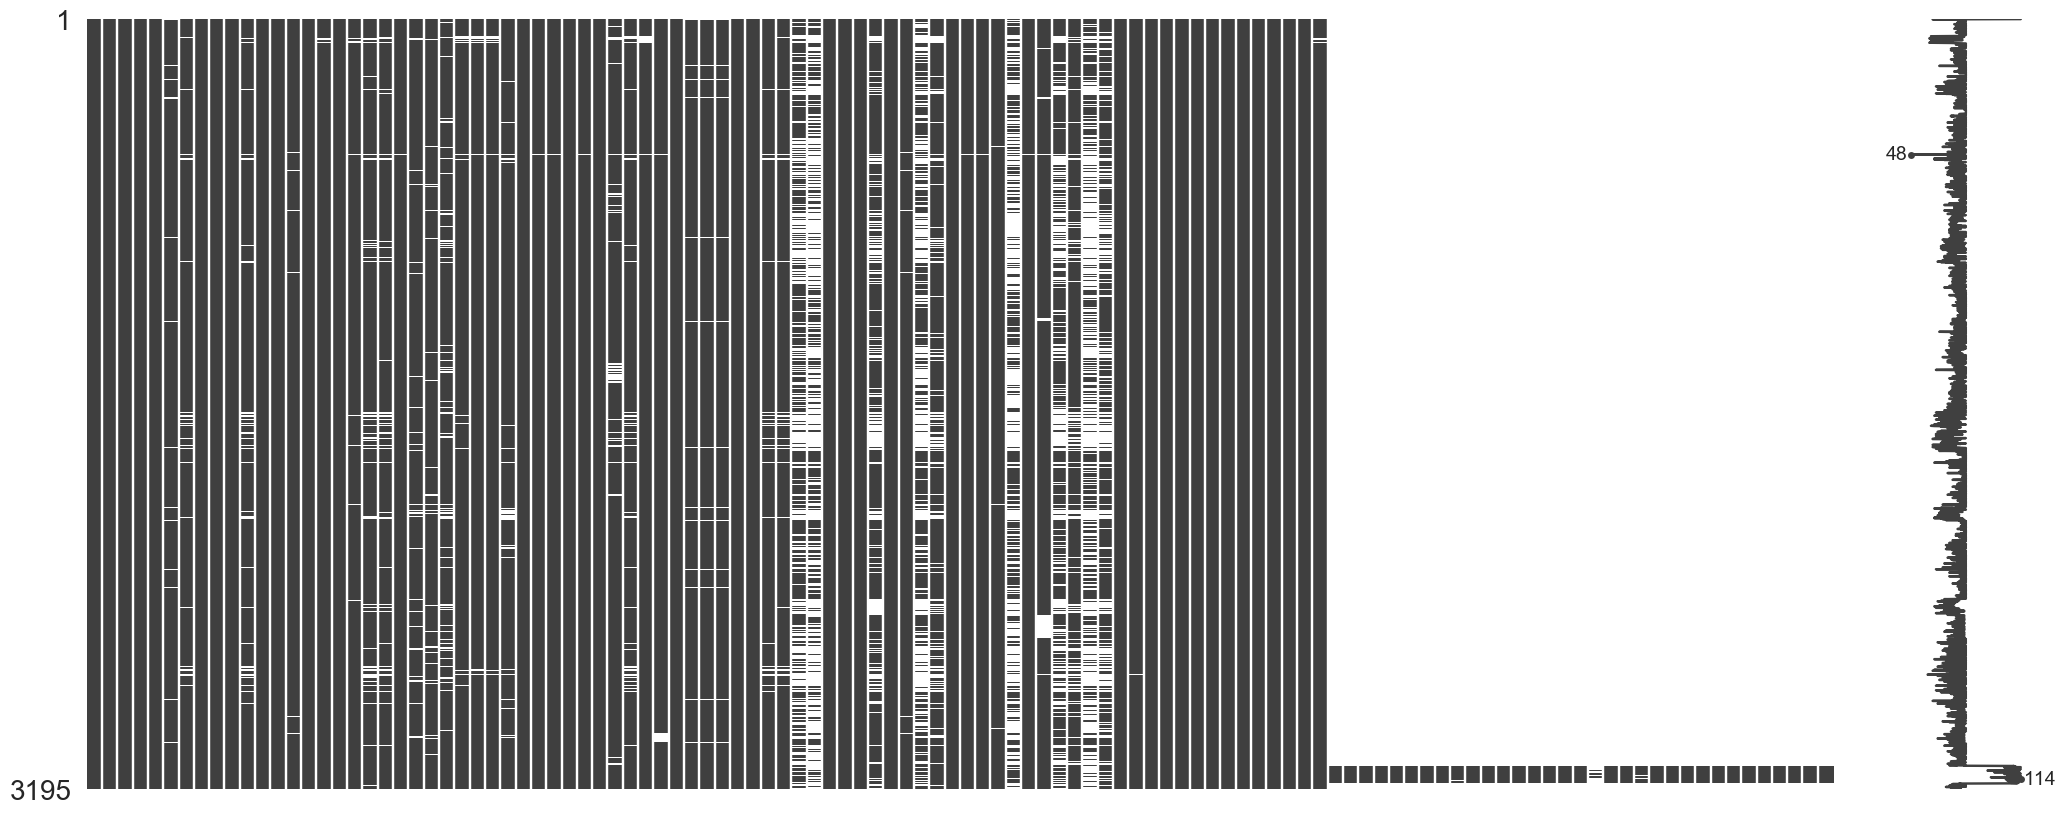

In [12]:
msno.matrix(df)

In [13]:
# Handling missing data.

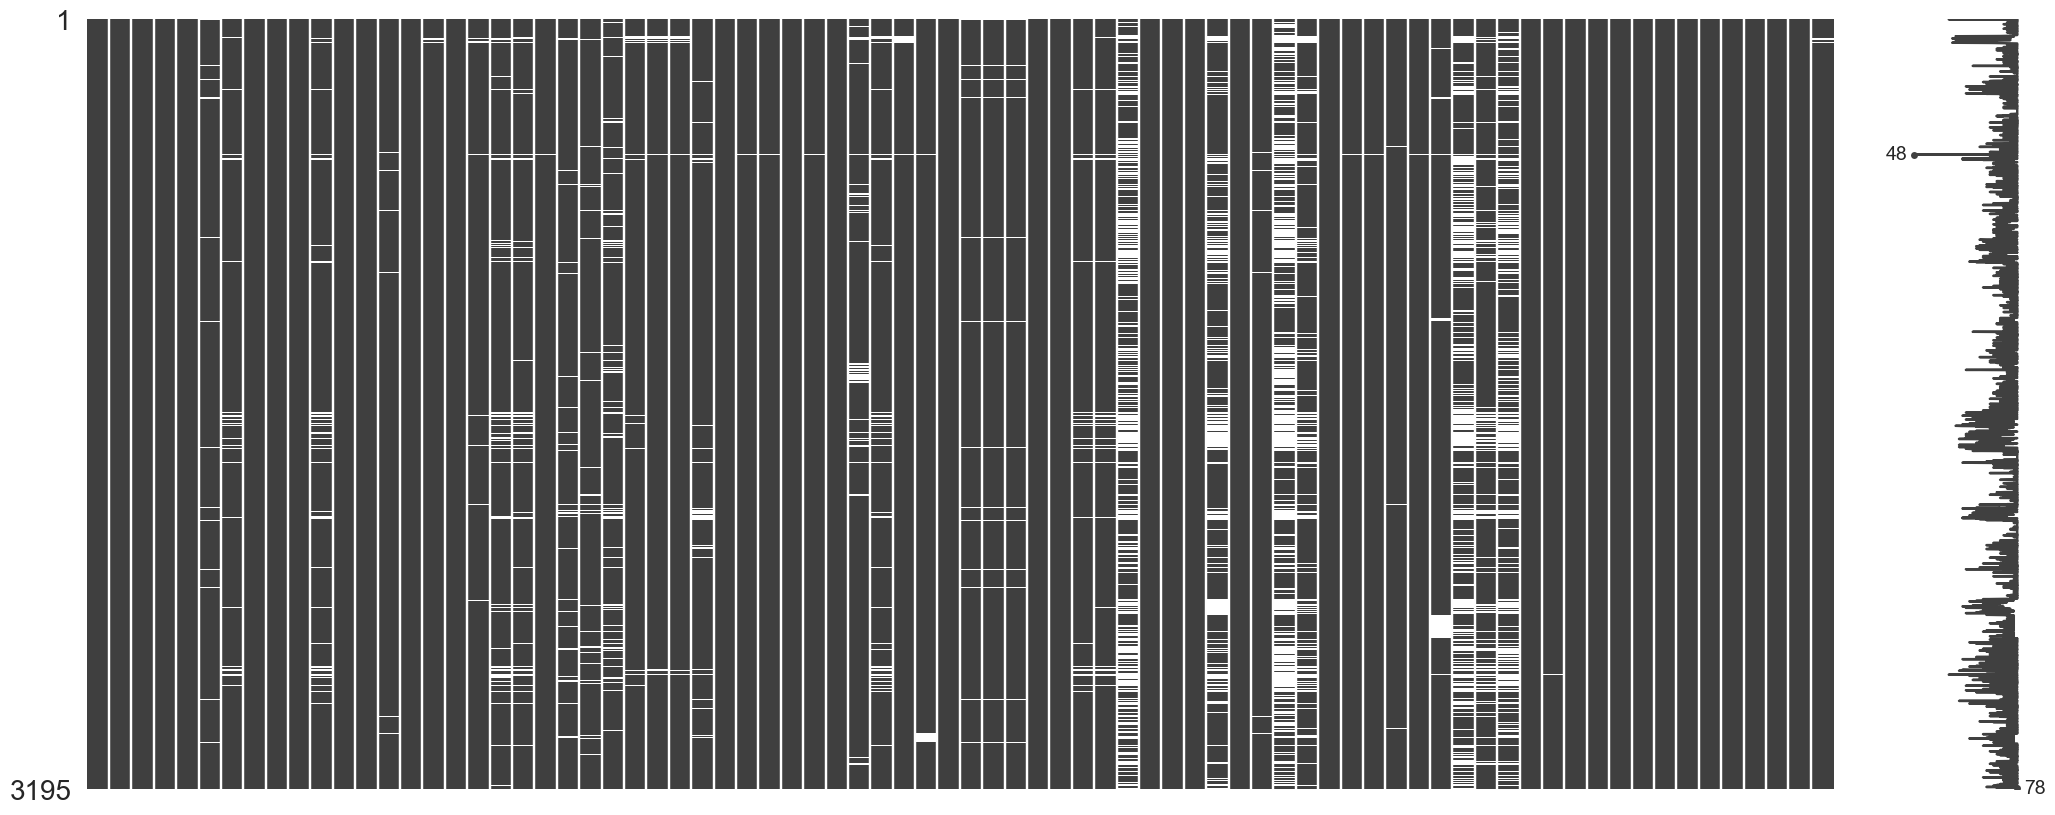

In [14]:
# Dropping anything with about half or more of its rows missing
cols_to_drop = list(df.isna().sum()[df.isna().sum() > 1600].index)
df.drop(columns=cols_to_drop, inplace=True)
msno.matrix(df)

In [15]:
total_columns_missing_data = len(df.isna().sum())
total_rows = 3195
total_columns = len(list(df.columns))
print(total_columns_missing_data, '\n', total_rows, '\n', total_columns)
# All columns are missing data. 
# Since the target variable is High school graduation rates
# We can see how much of that is missing.
df['High school graduation raw value'].isna().sum()/len(df)
# 3.1 % is missing.

78 
 3195 
 78


0.03129890453834116

In [16]:
# If we drop all columns missing more than 3.3% of data how much will we drop?
df.isna().sum()[df.isna().sum() > 0.033*3195]

Low birthweight raw value                                       107
Sexually transmitted infections raw value                       158
Teen births raw value                                           144
Primary care physicians raw value                               135
Mental health providers raw value                               252
Violent crime raw value                                         191
Child mortality raw value                                      1222
HIV prevalence raw value                                        718
Drug overdose deaths raw value                                 1422
Motor vehicle crash deaths raw value                            442
Children eligible for free or reduced price lunch raw value     125
Residential segregation - Black/White raw value                1084
Residential segregation - non-white/white raw value             348
Firearm fatalities raw value                                    933
dtype: int64

In [17]:
# Ok anything missing more than 10% of its data points is out
cols_to_drop = df.isna().sum()[df.isna().sum() > 320].index
df.drop(columns=cols_to_drop, axis=1, inplace=True)

In [18]:
df.isna().sum()[df.isna().sum() > 0.033*3195]

# What to do about the rest? Going to drop 

Low birthweight raw value                                      107
Sexually transmitted infections raw value                      158
Teen births raw value                                          144
Primary care physicians raw value                              135
Mental health providers raw value                              252
Violent crime raw value                                        191
Children eligible for free or reduced price lunch raw value    125
dtype: int64

In [19]:
df10 = df.copy() # making a 10% dataframe
report = pandas_profiling.ProfileReport(df10)
report

/usr/local/lib/python3.7/site-packages/pandas_profiling/describe.py:404: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,71
Number of observations,3195
Total Missing (%),0.9%
Total size in memory,1.7 MiB
Average record size in memory,568.0 B
Numeric,0
Categorical,70
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [34]:
pd.to_pickle(df10, 'still_missing_data_df')

In [25]:
# Making a stricter dataframe that cuts off where the target variable does
# i.e. anything missing more than 3.2% of data is out
cols_to_drop = df.isna().sum()[df.isna().sum() > df['High school graduation raw value'].isna().sum()].index
strict_df = df.drop(columns=cols_to_drop)
strict_df.isna().sum().max() # dropping missing values from this

strict_df.dropna(inplace=True)
strict_df.isna().sum()
pd.to_pickle(strict_df, 'df0')

In [27]:
col_names = list(strict_df.columns)
number_of_zeros = (strict_df[col_names]=='0').sum()
number_of_zeros.max()
# there are a lot of zeros going on

1690

In [31]:
type(strict_df['High school graduation raw value'][0]) # These things are strings.

str

In [32]:
strict_df.describe()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,...,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
count,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,...,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815
unique,50,250,2815,50,1673,2,2815,2815,2815,2815,...,2815,2815,2814,2809,2669,2815,2814,2718,2808,2325
top,48,001,51163,TX,Washington County,1,8155.6614838,0.2203221351,3.9366506202,4.0426472956,...,0.1273000851,0.0058414525,0.0140350877,0.0029908139,0,0.0141505746,0.6166666667,0,0.5,1
freq,219,47,1,219,30,2814,1,1,1,1,...,1,1,2,2,138,1,2,97,7,481


In [35]:
report = pandas_profiling.ProfileReport(strict_df)

/usr/local/lib/python3.7/site-packages/pandas_profiling/describe.py:404: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [36]:
report

Number of variables,64
Number of observations,2815
Total Missing (%),0.0%
Total size in memory,1.4 MiB
Average record size in memory,512.0 B
Numeric,1
Categorical,48
Boolean,0
Date,0
Text (Unique),15
Rejected,0


In [53]:
strict_df.head() # Have to drop the first row
test = strict_df.drop(0, axis=0)
test

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,...,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
3,01,001,01001,AL,Autauga County,1,8824.0571232,0.1841112436,4.2005779826,4.3067392835,...,0.1511963102,0.1925446815,0.004756414,0.0127918709,0.0010449697,0.0285745172,0.7447391179,0.0082854831,0.513422456,0.4200216232
4,01,003,01003,AL,Baldwin County,1,7224.6321603,0.1806045782,4.0987477691,4.2496487805,...,0.1994704366,0.0895319525,0.0077600316,0.0115647986,0.0006866452,0.0455020035,0.8304738793,0.0045451229,0.5145277198,0.4227909911
5,01,005,01005,AL,Barbour County,1,9586.165037,0.2577341563,5.0674383044,4.634994147,...,0.1882469331,0.4794222398,0.0065294816,0.004629996,0.0018599129,0.0420656905,0.4595567867,0.0119927317,0.472299169,0.677896347
6,01,007,01007,AL,Bibb County,1,11783.543675,0.1999691186,4.3633772783,4.3157100192,...,0.1602258691,0.2145756132,0.00427916,0.0022057526,0.0011469914,0.0263808011,0.7429857067,0.0039434768,0.4645314981,0.6835260746
7,01,009,01009,AL,Blount County,1,10908.101822,0.2109532316,4.5127526482,4.7015992588,...,0.1784255253,0.0146001758,0.0063261683,0.0030165653,0.0011721511,0.0956509748,0.8694430559,0.0187000425,0.5068863875,0.8995150204
8,01,011,01011,AL,Bullock County,1,12066.910263,0.2940771388,5.2266193898,4.7919184772,...,0.1582112717,0.691628674,0.0084392279,0.0019400524,0.0077602095,0.0824522262,0.2130177515,0.0110469241,0.4553302939,0.5137438153
9,01,013,01013,AL,Butler County,1,14018.606262,0.265026132,5.1174326174,5.1345730819,...,0.1955611602,0.4461538462,0.0037831021,0.0102900378,0.0005044136,0.0143757881,0.515964691,0.0071270193,0.5343253468,0.7123215735
10,01,015,01015,AL,Calhoun County,1,12217.759984,0.1958470142,4.2904480661,4.4765721664,...,0.1731225159,0.2079004254,0.0052907747,0.0099103968,0.0011243986,0.0374973851,0.7231103131,0.0088096833,0.5193065337,0.3369682556
11,01,017,01017,AL,Chambers County,1,11273.17098,0.2521983554,5.0370446678,4.9326462099,...,0.1907869368,0.3948921781,0.0029662148,0.0124877644,0.0004449322,0.0243822858,0.5549787916,0.0015389447,0.5212529291,0.4914803449
12,01,019,01019,AL,Cherokee County,1,11294.41054,0.1929159345,4.2779170785,4.6812529447,...,0.2261669954,0.042154929,0.0063039022,0.002977917,0.000309394,0.0164365549,0.9168503693,0.0009722504,0.5031906254,0.8573627304


In [54]:
def data_frame_float_converter(x):
    try:
        return x.astype('float')
    except:
        return x

In [55]:
data_type = test.iloc[:, 7:].apply(data_frame_float_converter, axis=0)

In [56]:
type(data_type['Poor or fair health raw value'].iloc[1])

numpy.float64

In [58]:
df_floats = pd.concat([test.iloc[:, :7], data_type], axis=1)
df_floats

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,...,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
3,01,001,01001,AL,Autauga County,1,8824.0571232,0.184111,4.200578,4.306739,...,0.151196,0.192545,0.004756,0.012792,0.001045,0.028575,0.744739,0.008285,0.513422,0.420022
4,01,003,01003,AL,Baldwin County,1,7224.6321603,0.180605,4.098748,4.249649,...,0.199470,0.089532,0.007760,0.011565,0.000687,0.045502,0.830474,0.004545,0.514528,0.422791
5,01,005,01005,AL,Barbour County,1,9586.165037,0.257734,5.067438,4.634994,...,0.188247,0.479422,0.006529,0.004630,0.001860,0.042066,0.459557,0.011993,0.472299,0.677896
6,01,007,01007,AL,Bibb County,1,11783.543675,0.199969,4.363377,4.315710,...,0.160226,0.214576,0.004279,0.002206,0.001147,0.026381,0.742986,0.003943,0.464531,0.683526
7,01,009,01009,AL,Blount County,1,10908.101822,0.210953,4.512753,4.701599,...,0.178426,0.014600,0.006326,0.003017,0.001172,0.095651,0.869443,0.018700,0.506886,0.899515
8,01,011,01011,AL,Bullock County,1,12066.910263,0.294077,5.226619,4.791918,...,0.158211,0.691629,0.008439,0.001940,0.007760,0.082452,0.213018,0.011047,0.455330,0.513744
9,01,013,01013,AL,Butler County,1,14018.606262,0.265026,5.117433,5.134573,...,0.195561,0.446154,0.003783,0.010290,0.000504,0.014376,0.515965,0.007127,0.534325,0.712322
10,01,015,01015,AL,Calhoun County,1,12217.759984,0.195847,4.290448,4.476572,...,0.173123,0.207900,0.005291,0.009910,0.001124,0.037497,0.723110,0.008810,0.519307,0.336968
11,01,017,01017,AL,Chambers County,1,11273.17098,0.252198,5.037045,4.932646,...,0.190787,0.394892,0.002966,0.012488,0.000445,0.024382,0.554979,0.001539,0.521253,0.491480
12,01,019,01019,AL,Cherokee County,1,11294.41054,0.192916,4.277917,4.681253,...,0.226167,0.042155,0.006304,0.002978,0.000309,0.016437,0.916850,0.000972,0.503191,0.857363


In [ ]:
# column_names = list(county_df.columns)

In [ ]:
# df_floats = pd.DataFrame()
# for col in col_names:
#     try:
#         df_floats[col] = county_df[col].astype('float')
#     except:
#         df_floats[col] = county_df[col]
        

In [63]:
df_floats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2814 entries, 3 to 3194
Data columns (total 63 columns):
State FIPS Code                                                         2814 non-null object
County FIPS Code                                                        2814 non-null object
5-digit FIPS Code                                                       2814 non-null object
State Abbreviation                                                      2814 non-null object
Name                                                                    2814 non-null object
County Ranked (Yes=1/No=0)                                              2814 non-null object
Premature death raw value                                               2814 non-null object
Poor or fair health raw value                                           2814 non-null float64
Poor physical health days raw value                                     2814 non-null float64
Poor mental health days raw value                     

In [65]:
pd.to_pickle(df_floats, 'df_ready1')

In [66]:
# To do: explore imputation with df10; saved as 'still_missing_data_df'
#        Think more on how you can improve this data to use in models (look at each
#        individual column and figure it out from there?)

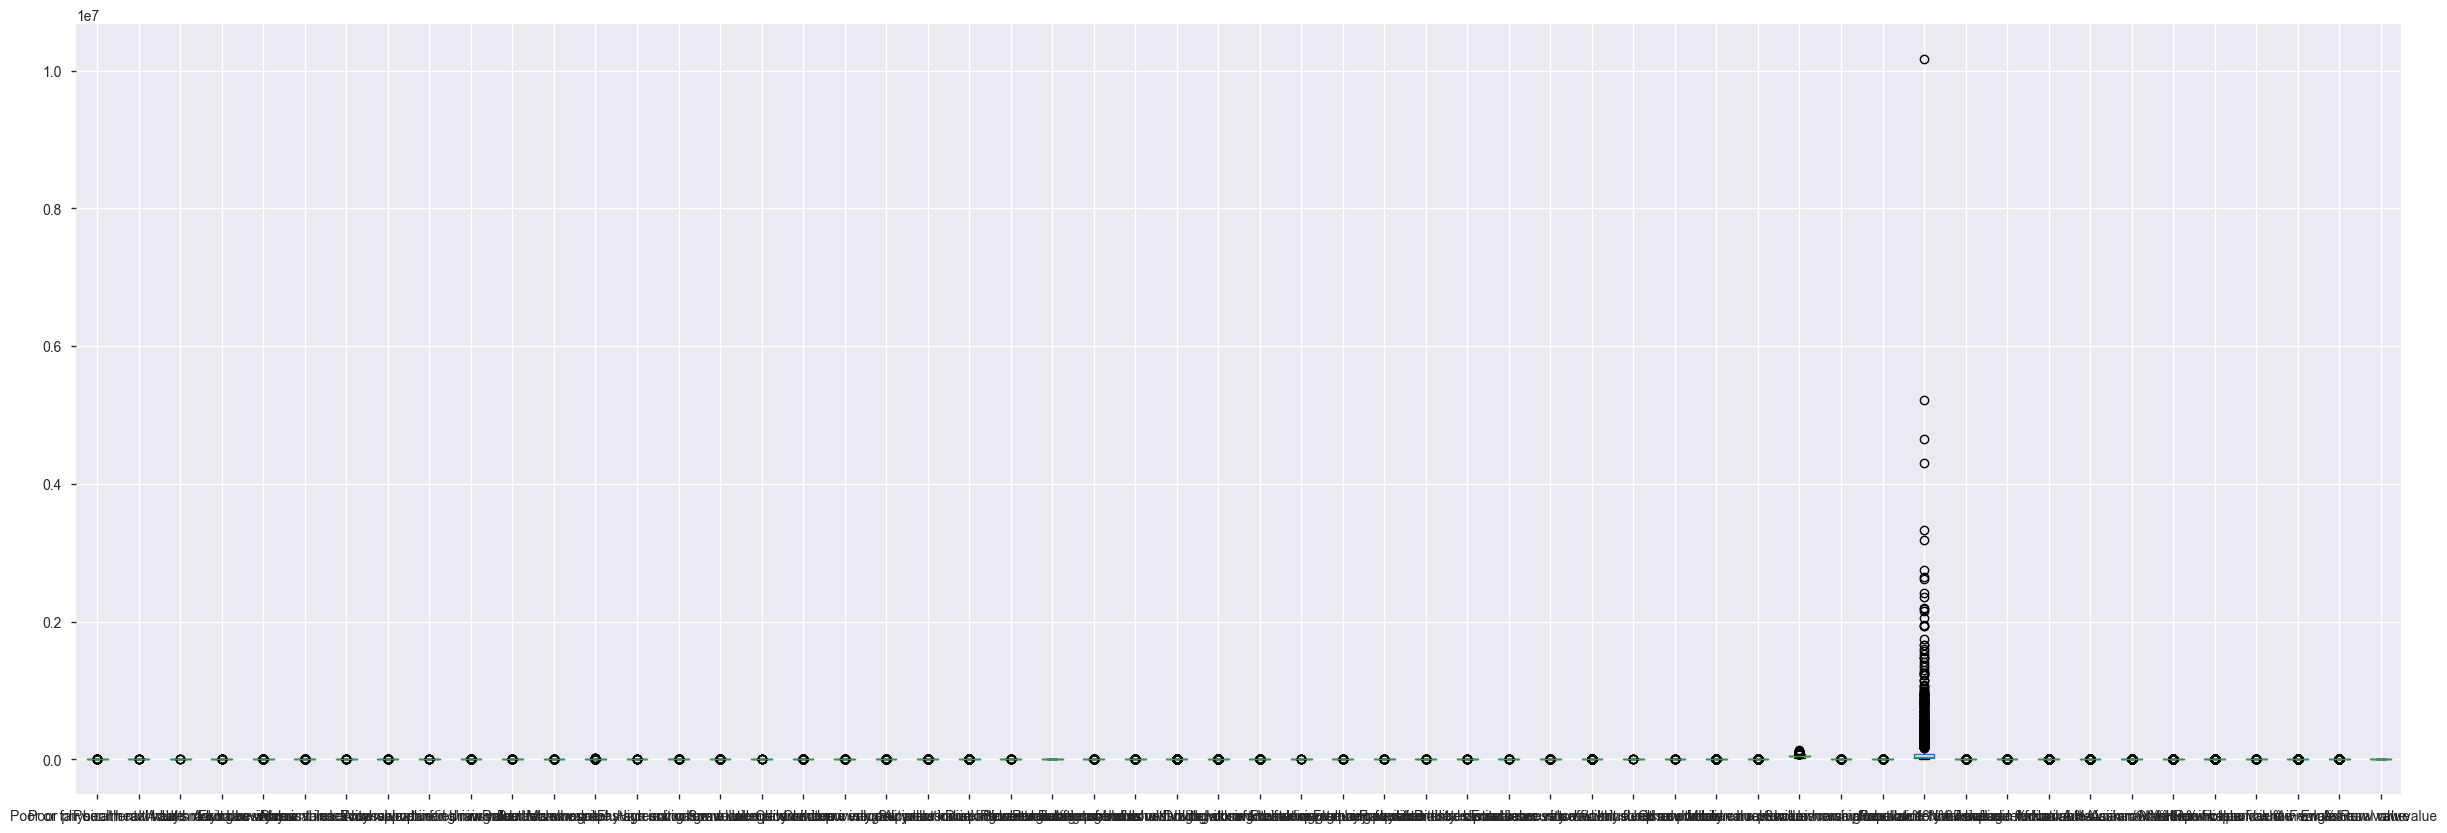

In [117]:
plt.figure(figsize=(30,10))
df_floats.boxplot()

In [95]:
df_floats.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,...,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
3,01,001,01001,AL,Autauga County,1,8824.0571232,0.184111,4.200578,4.306739,...,0.151196,0.192545,0.004756,0.012792,0.001045,0.028575,0.744739,0.008285,0.513422,0.420022
4,01,003,01003,AL,Baldwin County,1,7224.6321603,0.180605,4.098748,4.249649,...,0.199470,0.089532,0.007760,0.011565,0.000687,0.045502,0.830474,0.004545,0.514528,0.422791
5,01,005,01005,AL,Barbour County,1,9586.165037,0.257734,5.067438,4.634994,...,0.188247,0.479422,0.006529,0.004630,0.001860,0.042066,0.459557,0.011993,0.472299,0.677896
6,01,007,01007,AL,Bibb County,1,11783.543675,0.199969,4.363377,4.315710,...,0.160226,0.214576,0.004279,0.002206,0.001147,0.026381,0.742986,0.003943,0.464531,0.683526
7,01,009,01009,AL,Blount County,1,10908.101822,0.210953,4.512753,4.701599,...,0.178426,0.014600,0.006326,0.003017,0.001172,0.095651,0.869443,0.018700,0.506886,0.899515


In [108]:
df_floats['Adult obesity raw value'].max()

0.469

In [111]:
columns_list = df_floats.columns
for number, col in enumerate(columns_list):
    try:
        print(col,'----->', df_floats[col].max())
    except:
        continue

State FIPS Code -----> 56
County FIPS Code -----> 510
5-digit FIPS Code -----> 56045
State Abbreviation -----> WY
Name -----> Ziebach County
County Ranked (Yes=1/No=0) -----> 1
Premature death raw value -----> 9991.7905673
Poor or fair health raw value -----> 0.4073235516
Poor physical health days raw value -----> 6.4297779383
Poor mental health days raw value -----> 5.9641561528
Adult smoking raw value -----> 0.3907970276
Adult obesity raw value -----> 0.469
Food environment index raw value -----> 10.0
Physical inactivity raw value -----> 0.451
Access to exercise opportunities raw value -----> 1.0
Excessive drinking raw value -----> 0.2944011884
Alcohol-impaired driving deaths raw value -----> 1.0
Uninsured raw value -----> 0.3087736306
Dentists raw value -----> 0.0072512811
Preventable hospital stays raw value -----> 17731.0
Mammography screening raw value -----> 0.62
Flu vaccinations raw value -----> 0.65
High school graduation raw value -----> 1.0
Some college raw value -----> 0.90